In [316]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl
import control.matlab as mcontrol
import scipy
from scipy.integrate import simps

In [144]:
Xcm = 1.052
Xpe = 0.261
L = 3.304
Df = 0.127
Tlin = 230.57
Izz = 15.07
M = 23.545
g = 9.8055
dar = 1.091
Cd = 0.432
Vxlin = -10.0
Vvlin = 2.2

# X = [x,y,theta,xp,yp,thetap]
# Xp = [xp,yp,thetap,xpp,ypp,thetapp]
A = np.array([[0, 0, 0, 1],
              [(1/M)*((1/2)*dar*Cd*Vxlin**2*L*Df + (1/2)*dar*Cd*L*Df*Vvlin**2), (1/M)*(Vxlin *dar*Cd*((Df/2)**2*np.pi)), 0, 0],
              [(1/M)*(-M*g+(1/2)*Vxlin**2*dar*Cd*(np.pi*(Df/2)**2) - (1/2)*dar*Cd*(np.pi*(Df/2)**2)*Vvlin**2), 0, 0, 0],
              [(1/Izz)*((1/2)*Vxlin**2*dar*Xpe*Cd*(np.pi*(Df/2)**2)- (1/2)*dar*Cd*Xpe*(np.pi*(Df/2)**2)*Vvlin**2), 0, 0, 0]])

# u = [T,tau,Vv]

B = np.array([[0, 0, 0],
              [1/M, 0, 0],
              [0, -Tlin/M, - (1/2)*dar*Cd*L*Df*2*Vvlin/M],
              [0, -Tlin*Xcm/Izz, - (1/2)*dar*Cd*Xpe*L*Df*2*Vvlin/Izz]])
# Matriz B com perturbação, para pegar as funções transferência

#Para pegar a contrabilidade a B e a E são separadas

Bcont = np.array([[0, 0],
              [1/M, 0],
              [0, -Tlin/M],
              [0, -Tlin*Xcm/Izz]])

E = np.array([[0],
              [0],
              [ - (1/2)*dar*Cd*L*Df*2*Vvlin/M],
              [- (1/2)*dar*Cd*Xpe*L*Df*2*Vvlin/Izz]])

C = np.array([[ 0, 1, 0, 0],
              [ 0, 0, 1, 0]])

D = np.array([[ 0, 0,0],
              [ 0, 0,0]])

In [145]:
p = [-1,  -0.5 ,  -0.5 ,-2]
Kbun = scipy.signal.place_poles(A, Bcont, p, method='YT')
Kgain = Kbun.gain_matrix
Kgain

array([[ 1.03669087e+01,  1.17127957e+01,  7.54265493e-14,
        -9.93578179e-13],
       [-2.17757345e-01,  2.00817817e-17,  6.34201043e-03,
        -2.21310240e-01]])

In [146]:
Abarra = A - np.dot(Bcont,Kgain)
print(Abarra)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 8.28781488e-14 -5.00000000e-01 -3.20350602e-15  4.21991157e-14]
 [-1.19258754e+01  1.96655613e-16  6.21056422e-02 -2.16723304e+00]
 [-3.50000000e+00  3.23226924e-16  1.02078020e-01 -3.56210564e+00]]


In [147]:
sys = ctl.ss(Abarra,B,C,0)
wn,z,pole = sys.damp()
pole

array([-2. +0.j, -1. +0.j, -0.5+0.j, -0.5+0.j])

In [148]:
G = ctl.tf([-9.79273731153111,- 4.89636863484562, + 157.678706348201,78.8393531688707],[1,4,5.25,2.75,0.5])
G

TransferFunction(array([ -9.79273731,  -4.89636863, 157.67870635,  78.83935317]), array([1.  , 4.  , 5.25, 2.75, 0.5 ]))

In [149]:
sysred = ctl.balred(sys,2)
Gred = ctl.tf(sysred)
Gred

TransferFunction([[array([5.23690760e-31, 1.86924305e-30]), array([-8.85204075e-14, -3.74340798e-13]), array([ 5.15822112e-17, -7.82698844e-17])], [array([ 5.56923888e-17, -2.81707916e-16]), array([-15.27512919,  55.82578665]), array([-0.02085826,  0.00914418])]], [[array([1.        , 1.10976131, 0.35927387]), array([1.        , 1.10976131, 0.35927387]), array([1.        , 1.10976131, 0.35927387])], [array([1.        , 1.10976131, 0.35927387]), array([1.        , 1.10976131, 0.35927387]), array([1.        , 1.10976131, 0.35927387])]])

In [150]:
Tf = Gred[1,1]
Tf

TransferFunction(array([-15.27512919,  55.82578665]), array([1.        , 1.10976131, 0.35927387]))

Provando por Bode que é similar

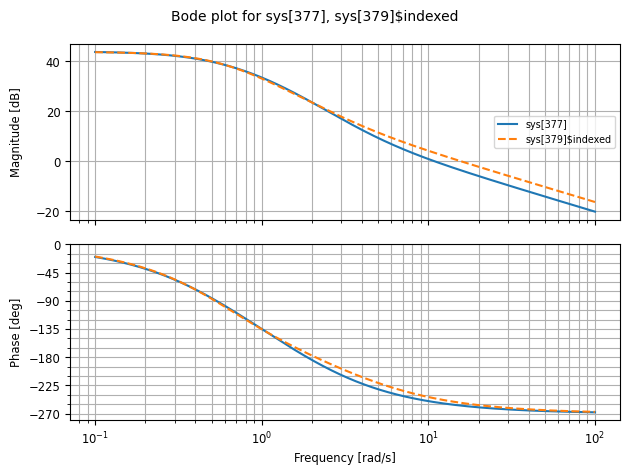

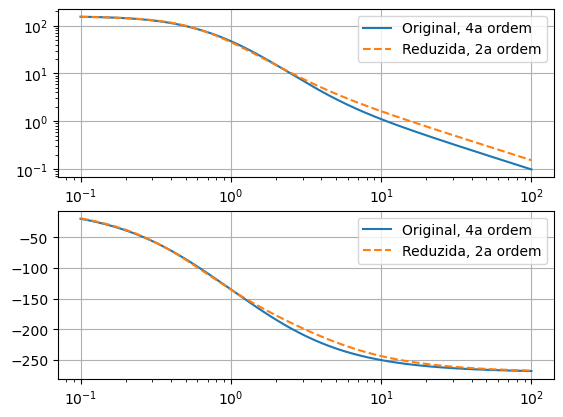

In [151]:
mag, phase, omega = mcontrol.bode(G,dB=True, deg= True)
mag2, phase2, omega2 = mcontrol.bode(Tf,dB=True, deg= True , linestyle = 'dashed')
f,(ax1,ax2) = plt.subplots(2, 1)
ax1.plot(omega, mag, label = "Original, 4a ordem")
ax1.plot(omega2, mag2, label = "Reduzida, 2a ordem",linestyle = 'dashed')
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_xscale('log')
ax1.grid('log')
ax2.grid('log')
ax2.plot(omega, phase/(np.pi)*180,label = "Original, 4a ordem" )
ax2.plot(omega2, phase2/(np.pi)*180, label = "Reduzida, 2a ordem",linestyle = 'dashed')
ax1.legend()
ax2.legend()

Ambas as funções de transferência de ordem reduzida podem ser escritas da seguinte forma:

\begin{align}
    G = \frac{ms+n}{s^2 + bs + c}
\end{align}

Função de transferência do compensador

\begin{align}
    G_c = \frac{K_i+K_ps+K_ds^2}{s}
\end{align}

Função de transferência em malha fechada:

\begin{align}
    T=\frac{GG_c}{1+GG_c}=\frac{G_cN}{D+G_cN}=\frac{(K_i+K_ps+K_ds^2)N}{Ds+(K_i+K_ps+K_ds^2)N}
\end{align}

\begin{align}
    T=\frac{mK_ds^3+(mK_p+nK_d)s^2+(nK_p+mK_i)s+nK_i}{(1+mK_d)s^3+(b+mK_p+nK_d)s^2+(c+nK_p+mK_i)s+nK_i}
\end{align}

No cálculo do ITAE, dividiu-se o denominador de $T$ pelo coeficiente dominante para determinar os ganhos:

\begin{align}
    s^3 + 1,783\omega_n s^2 + 2,172 \omega_n^2 s +\omega_n^3
\end{align}

A função de transferência de ordem reduzida pode ser escrita da seguinte forma:

\begin{align}
    G = \frac{ms+n}{s^2 + bs + c}
\end{align}
Função de transferência do compensador

\begin{align}
    G_c = \frac{K_i+K_ps+K_ds^2}{s}
\end{align}
Função de transferência em malha fechada:

\begin{align}
    T=\frac{GG_c}{1+GG_c}=\frac{G_cN}{D+G_cN}=\frac{(K_i+K_ps+K_ds^2)N}{Ds+(K_i+K_ps+K_ds^2)N}
\end{align}

\begin{align}
    T=\frac{mK_ds^3+(mK_p+nK_d)s^2+(nK_p+mK_i)s+nK_i}{(1+mK_d)s^3+(b+mK_p+nK_d)s^2+(c+nK_p+mK_i)s+nK_i}
\end{align}

No cálculo do ITAE, dividiu-se o denominador de $T$ pelo coeficiente dominante para determinar os ganhos:

\begin{align}
    s^3 + 1,783\omega_n s^2 + 2,172 \omega_n^2 s +\omega_n^3
\end{align}

In [152]:
m1 = Tf.num[0][0][0]
n1 = Tf.num[0][0][1]
b1 = Tf.den[0][0][1]
c1 = Tf.den[0][0][2]
print(m1,n1,b1,c1)

-15.275129192144329 55.82578665347716 1.1097613051727344 0.3592738659056031


In [153]:
zeta = 0.707
Ta = 6
w1 = 4/(Ta*zeta)

In [154]:
A_1 = ([
        [m1, 0, n1-m1*1.783*w1],
        [n1, m1, -m1*2.172*(w1**2)],
        [0, n1, -m1*w1**3]])

B_1 = ([[1.783*w1-b1],[2.172*w1**2-c1],[w1**3]])


K=np.linalg.solve(A_1,B_1)
Kp, Ki, Kd = K[0][0],  K[1][0], K[2][0]

Gc = (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))

TfMF = ctl.feedback(Gc * Tf)
TfMF

TransferFunction(array([-0.17958309,  0.26959122,  1.22515622,  0.68786401]), array([0.82041691, 1.37935253, 1.58443009, 0.68786401]))

In [155]:
Gc

TransferFunction(array([0.01175657, 0.02531752, 0.01232162]), array([1, 0]))

In [156]:
print(f"Kp = {Kp},Ki = {Ki},Kd = {Kd}")

Kp = 0.02531752095665766,Ki = 0.012321617840690559,Kd = 0.011756567456662235


Pré filtro
Fazer o formato do numerador ser somente o último termo do denominador

In [157]:
TfPf = ctl.tf([TfMF.num[0][0][3]], [TfMF.den[0][0][0], TfMF.den[0][0][1], TfMF.den[0][0][2], TfMF.den[0][0][3]])
TfPf

TransferFunction(array([0.68786401]), array([0.82041691, 1.37935253, 1.58443009, 0.68786401]))

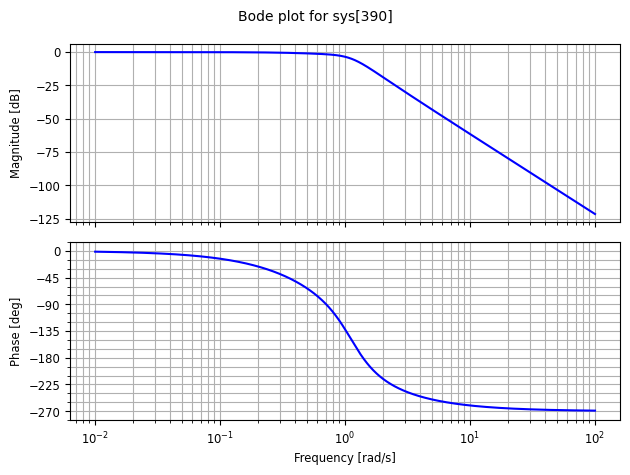

In [158]:
w = np.linspace(0.01,10**2,10**6)
mag, phase  = ctl.bode_plot(TfPf,omega = w, color='blue', dB=True)

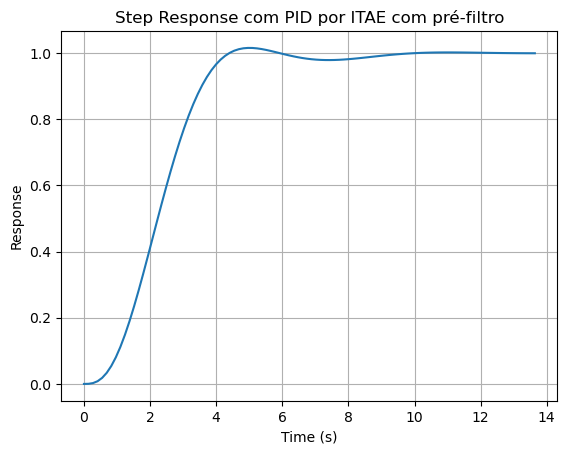

In [159]:
T, yout_opt = ctl.step_response(TfPf)
plt.figure()
plt.plot(T, yout_opt)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por ITAE com pré-filtro')
plt.grid(True)
plt.show()

PID por alocação de polos, utilizando novamente a equação reduzida

A função de transferência de ordem reduzida pode ser escrita da seguinte forma:

\begin{align}
    G = \frac{ms+n}{s^2 + bs + c}
\end{align}
Função de transferência do compensador

\begin{align}
    G_c = \frac{K_i+K_ps+K_ds^2}{s}
\end{align}
Função de transferência em malha fechada:

\begin{align}
    T=\frac{GG_c}{1+GG_c}=\frac{G_cN}{D+G_cN}=\frac{(K_i+K_ps+K_ds^2)N}{Ds+(K_i+K_ps+K_ds^2)N}
\end{align}

\begin{align}
    T=\frac{mK_ds^3+(mK_p+nK_d)s^2+(nK_p+mK_i)s+nK_i}{(1+mK_d)s^3+(b+mK_p+nK_d)s^2+(c+nK_p+mK_i)s+nK_i}
\end{align}

No cálculo por alocação de polos, queremos que o polinômio caracteristico tenha o formato :
\begin{align}
    (s-p1)*(s-p2)*(s-p3)
\end{align}

Ou seja:

\begin{align}
    s^3+(-p1-p2-p3)s^2+(p1*p2+p1*p3+p2*p3)s - p1*p2*p3
\end{align}

Disso temos o seguinte sistema:

\begin{align}
    \frac{(b+mK_p+nK_d)}{(1+mK_d)}= (-p1-p2-p3)
\end{align}

\begin{align}
    \frac{(c+nK_p+mK_i)}{(1+mK_d)}= (p1*p2+p1*p3+p2*p3)
\end{align}

\begin{align}
    \frac{nK_i}{(1+mK_d)}= -p1*p2*p3
\end{align}

In [160]:
G.poles()

array([-2.        +0.j, -1.        +0.j, -0.50000002+0.j, -0.49999998+0.j])

In [161]:
Tf.poles()

array([-0.55488065+0.2266745j, -0.55488065-0.2266745j])

In [162]:
p1 = -2 + 0.707j
p2 = -2 - 0.707j
p3 = -3 + 0j

In [238]:
A_1 = ([
        [m1, 0, n1-m1*(-p1-p2-p3)],
        [n1, m1, -m1*(p1*p2+p1*p3+p2*p3)],
        [0, n1, -m1*(-p1*p2*p3)]])

B_1 = ([[(-p1-p2-p3)-b1],[(p1*p2+p1*p3+p2*p3)-c1],[(-p1*p2*p3)]])


K=np.linalg.solve(A_1,B_1)
Kp, Ki, Kd = K[0][0],  K[1][0], K[2][0]

Gc = (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))

Tfaloc =ctl.feedback(Gc * Tf)
Tfaloc


TransferFunction(array([-0.69946079+0.j,  0.99401317+0.j,  4.59957774+0.j,  4.05714321+0.j]), array([0.30053921+0.j, 2.10377448+0.j, 4.9588516 +0.j, 4.05714321+0.j]))

In [164]:
print(f"Kp = {Kp},Ki = {Ki},Kd = {Kd}")

Kp = (0.10227708791929656+0j),Ki = (0.07267507454461287-0j),Kd = (0.04579082638385666+0j)


In [242]:
Tftot = ctl.feedback(Gc * G)
Tftot

TransferFunction(array([-0.44841753+0.j, -1.22578142+0.j,  6.00776403+0.j, 19.38119409+0.j,
       19.52277119+0.j,  5.72965587+0.j]), array([ 0.55158247+0.j,  2.77421858+0.j, 11.25776403+0.j, 22.13119409+0.j,
       20.02277119+0.j,  5.72965587+0.j]))

In [243]:
Gc

TransferFunction(array([0.04579083+0.j, 0.10227709+0.j, 0.07267507+0.j]), array([1, 0]))

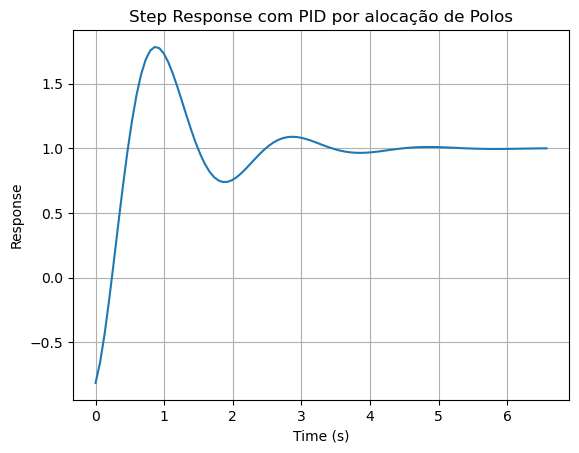

In [240]:
T, yout_opt = ctl.step_response(Tftot)
plt.figure()
plt.plot(T, yout_opt)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por alocação de Polos')
plt.grid(True)
plt.show()

Só plotando o PID por root locus, obtido no matlab

In [167]:
Kp = 0.00436
Ki = 0.0021
Kd = 0.00459
Gc = (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))

Tfroot =ctl.feedback(Gc * G)
Tfroot

TransferFunction(array([-0.04494866, -0.06517067,  0.68183235,  1.03906942,  0.67486486,
        0.16556264]), array([0.95505134, 3.93482933, 5.93183235, 3.78906942, 1.17486486,
       0.16556264]))

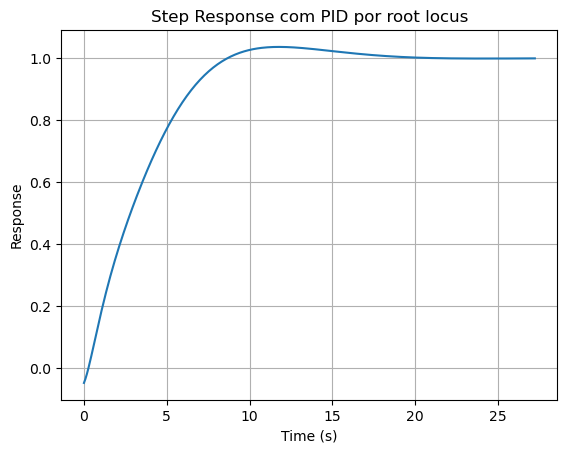

In [168]:
T, yout_opt = ctl.step_response(Tfroot)
plt.figure()
plt.plot(T, yout_opt)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por root locus')
plt.grid(True)
plt.show()

In [319]:
def itae_cost(params, Tf):
    # PID parameters
    Kp, Ki, Kd = params
    
    # Define the PID controller transfer function
    pid = ctl.TransferFunction([Kd, Kp, Ki], [1, 0])
    
    # Closed-loop transfer function
    system = Tf
    
    # Time vector for simulation
    T = np.linspace(0, 10, 1000)
    
    # Step response of the closed-loop system
    T, yout = ctl.step_response(system, T)
    
    # ITAE calculation
    itae = simps(np.abs(1 - yout),T)
    
    return itae

Cálculo das reações

Pode ser feita a FT das reções com ctl.feedback(Gc,G).
Ou, Gc/(1+Gc*Gp)

Para o Itae

In [169]:
Tf

TransferFunction(array([-15.27512919,  55.82578665]), array([1.        , 1.10976131, 0.35927387]))

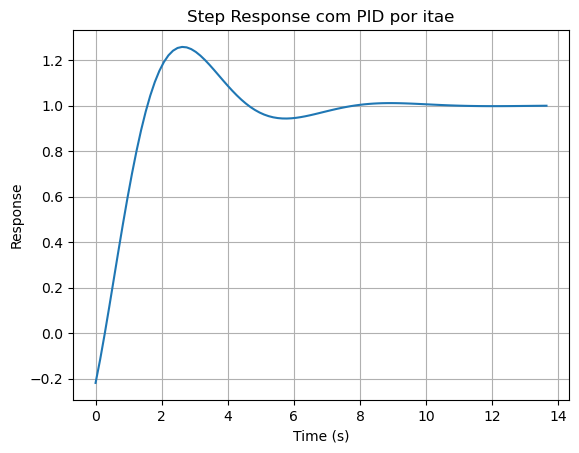

In [346]:
Kp = 0.02531752095665766
Ki = 0.012321617840690559
Kd = 0.011756567456662235
paritae = [Kp,Ki,Kd]
Gcitae = (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))
Tfitae = ctl.feedback(Gcitae * Tf)
Titae, yitae = ctl.step_response(Tfitae)
plt.figure()
plt.plot(Titae, yitae)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por itae')
plt.grid(True)
plt.show()

In [345]:
ititae = itae_cost(paritae, Tfitae)
ititae

C:\Users\super\AppData\Local\Temp\ipykernel_6384\2419259859.py:18: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  itae = simps(np.abs(1 - yout),T)


1.504793105612112

In [324]:
mcontrol.margin(Gcitae * Tf)

(inf, 42.33081055882974, nan, 1.0956883606425634)

array([[list([<matplotlib.lines.Line2D object at 0x0000018070F5F980>])],
       [list([<matplotlib.lines.Line2D object at 0x0000018070F5C4D0>])]],
      dtype=object)

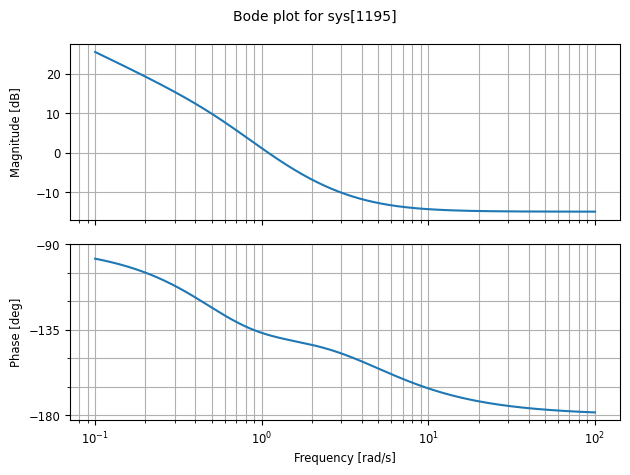

In [323]:
ctl.bode_plot(Gcitae * Tf)

In [217]:
s= ctl.tf([1,0],[1])
ritae = ctl.feedback(Gcitae,Tf)*1/(1+10**(0)*s)
ritae

TransferFunction(array([0.01175657, 0.0383645 , 0.04464185, 0.02276998, 0.00442684]), array([0.82041691, 2.19976944, 2.96378261, 2.27229409, 0.68786401]))

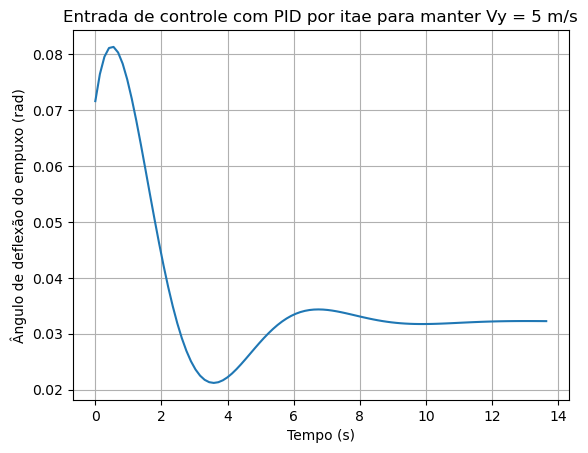

In [229]:
Tritae, yritae = ctl.step_response(ritae)
plt.figure()
plt.plot(Tritae, 5*yritae)
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de deflexão do empuxo (rad)')
plt.title('Entrada de controle com PID por itae para manter Vy = 5 m/s')
plt.grid(True)
plt.show()


Para o ziegler nichols

In [215]:
G

TransferFunction(array([ -9.79273731,  -4.89636863, 157.67870635,  78.83935317]), array([1.  , 4.  , 5.25, 2.75, 0.5 ]))

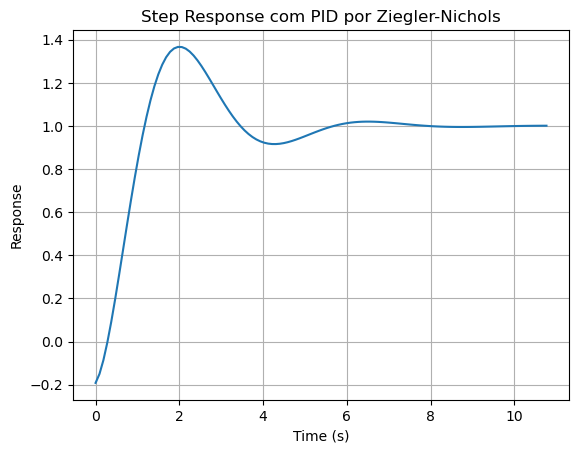

In [325]:
Kp = 0.035164805511670616
Ki = 0.018796013904133223
Kd = 0.016447151414397777
parzieg = [Kp,Ki,Kd]
Gczieg = (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))
Tfzieg = ctl.feedback(Gczieg * G)
Tzieg, yzieg = ctl.step_response(Tfzieg)
plt.figure()
plt.plot(Tzieg, yzieg)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por Ziegler-Nichols')
plt.grid(True)
plt.show()

In [331]:
itzieg = itae_cost(parzieg, Tfzieg)
itzieg

C:\Users\super\AppData\Local\Temp\ipykernel_6384\2419259859.py:18: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  itae = simps(np.abs(1 - yout),T)


1.4061599332816899

In [332]:
mcontrol.margin(Gczieg * G)

(inf, 35.081353848112855, nan, 1.432527327570761)

In [226]:
s= ctl.tf([1,0],[1])
rzieg = ctl.feedback(Gczieg,G)*1/(1+10**(0)*s)
rzieg

TransferFunction(array([0.01644715, 0.10095341, 0.24580278, 0.30502895, 0.20360586,
       0.06927144, 0.00939801]), array([ 0.83893737,  4.41404635, 11.06223026, 16.98651289, 15.73549329,
        7.71796726,  1.48186558]))

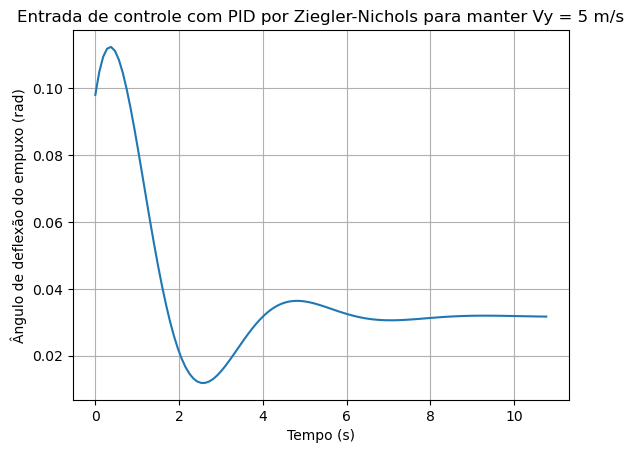

In [230]:
Trzieg, yrzieg = ctl.step_response(rzieg)
plt.figure()
plt.plot(Trzieg, 5*yrzieg)
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de deflexão do empuxo (rad)')
plt.title('Entrada de controle com PID por Ziegler-Nichols para manter Vy = 5 m/s')
plt.grid(True)
plt.show()

Por alocação

In [254]:
Tftot

TransferFunction(array([-0.44841753+0.j, -1.22578142+0.j,  6.00776403+0.j, 19.38119409+0.j,
       19.52277119+0.j,  5.72965587+0.j]), array([ 0.55158247+0.j,  2.77421858+0.j, 11.25776403+0.j, 22.13119409+0.j,
       20.02277119+0.j,  5.72965587+0.j]))

In [256]:
Tfaloc

TransferFunction(array([-0.44841753, -1.22578142,  6.00776403, 19.38119409, 19.52277119,
        5.72965587]), array([ 0.55158247,  2.77421858, 11.25776403, 22.13119409, 20.02277119,
        5.72965587]))

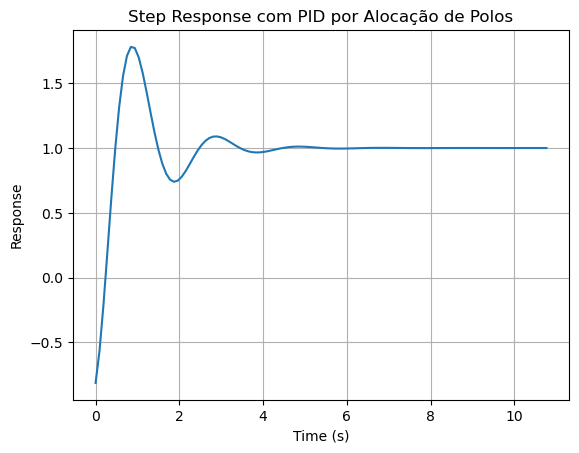

In [337]:
Kp = 0.10227708791929656
Ki = 0.07267507454461287
Kd = 0.04579082638385666
paraloc = [Kp,Ki,Kd]
Gcaloc= (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))
Tfaloc = ctl.feedback(Gcaloc * G)
Taloc, yaloc = ctl.step_response(Tfaloc,T=Tzieg)
plt.figure()
plt.plot(Taloc, yaloc)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por Alocação de Polos')
plt.grid(True)
plt.show()

In [348]:
Tfaloc

TransferFunction(array([-0.44841753, -1.22578142,  6.00776403, 19.38119409, 19.52277119,
        5.72965587]), array([ 0.55158247,  2.77421858, 11.25776403, 22.13119409, 20.02277119,
        5.72965587]))

In [349]:
Gcaloc * G

TransferFunction(array([-0.44841753, -1.22578142,  6.00776403, 19.38119409, 19.52277119,
        5.72965587]), array([1.  , 4.  , 5.25, 2.75, 0.5 , 0.  ]))

In [350]:
1+Gcaloc*G

TransferFunction(array([ 0.55158247,  2.77421858, 11.25776403, 22.13119409, 20.02277119,
        5.72965587]), array([1.  , 4.  , 5.25, 2.75, 0.5 , 0.  ]))

In [338]:
italoc = itae_cost(paraloc, Tfaloc)
italoc

C:\Users\super\AppData\Local\Temp\ipykernel_6384\2419259859.py:18: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  itae = simps(np.abs(1 - yout),T)


1.1997312299252771

In [336]:
mcontrol.margin(Gcaloc * G)

(inf, 18.54897586113367, nan, 3.2348463882890917)

In [253]:
G

TransferFunction(array([ -9.79273731,  -4.89636863, 157.67870635,  78.83935317]), array([1.  , 4.  , 5.25, 2.75, 0.5 ]))

In [298]:
s= ctl.tf([1,0],[1])
raloc = ctl.feedback(Gcaloc,G)*1/(1+10**(0.5)*s)
raloc

TransferFunction(array([0.04579083, 0.28544039, 0.72218526, 0.95357978, 0.68570155,
       0.250995  , 0.03633754]), array([ 1.74425691,  9.3244319 , 38.37439427, 81.24274469, 85.44875613,
       38.14153395,  5.72965587]))

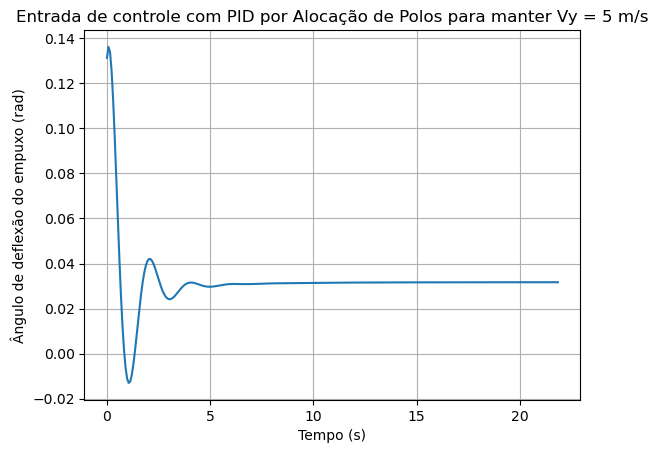

In [308]:
Traloc, yraloc = ctl.step_response(raloc)
plt.figure()
plt.plot(Traloc, 5*yraloc)
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de deflexão do empuxo (rad)')
plt.title('Entrada de controle com PID por Alocação de Polos para manter Vy = 5 m/s')
plt.grid(True)
plt.show()

Root locus

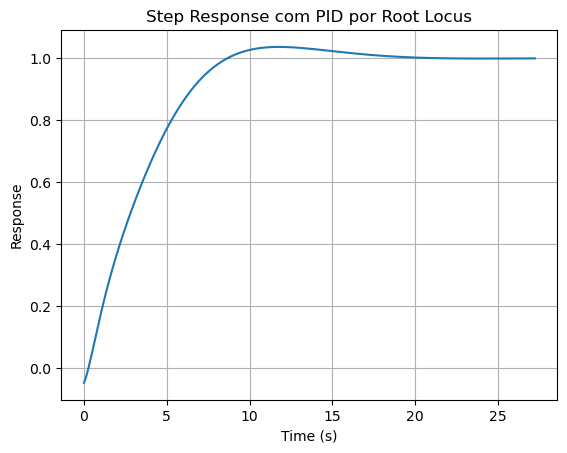

In [339]:
Kp = 0.00436
Ki = 0.0021
Kd = 0.00459
parroot = [Kp,Ki,Kd]
Gcroot= (Kp + ctl.tf([Ki], [1, 0]) + ctl.tf([Kd, 0], [1]))
Tfroot = ctl.feedback(Gcroot * G)
Troot, yroot = ctl.step_response(Tfroot)
plt.figure()
plt.plot(Troot, yroot)
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response com PID por Root Locus')
plt.grid(True)
plt.show()

In [341]:
itroot = itae_cost(parroot, Tfroot)
itroot

C:\Users\super\AppData\Local\Temp\ipykernel_6384\2419259859.py:18: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  itae = simps(np.abs(1 - yout),T)


3.259045395371609

In [342]:
mcontrol.margin(Gcroot * G)

(inf, 72.18462292775712, nan, 0.28019474411937817)

In [285]:
s= ctl.tf([1,0],[1])
rroot = ctl.feedback(Gcroot,G)*1/(1+10**(0)*s)
rroot

TransferFunction(array([0.00459  , 0.02272  , 0.0436375, 0.0439125, 0.02531  , 0.007955 ,
       0.00105  ]), array([0.95505134, 4.88988067, 9.86666168, 9.72090176, 4.96393428,
       1.3404275 , 0.16556264]))

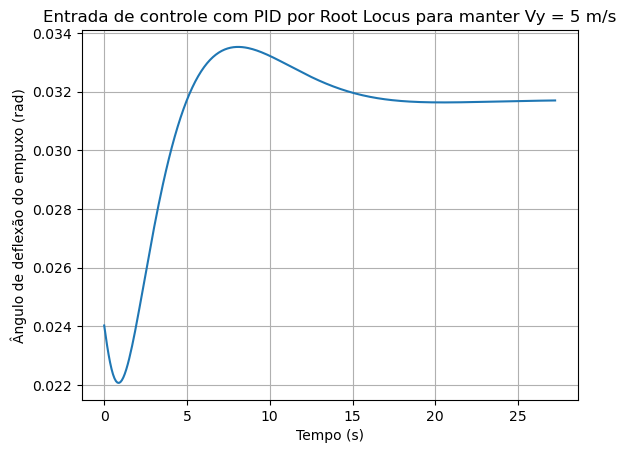

In [286]:
Trroot, yrroot = ctl.step_response(rroot)
plt.figure()
plt.plot(Trroot, 5*yrroot)
plt.xlabel('Tempo (s)')
plt.ylabel('Ângulo de deflexão do empuxo (rad)')
plt.title('Entrada de controle com PID por Root Locus para manter Vy = 5 m/s')
plt.grid(True)
plt.show()

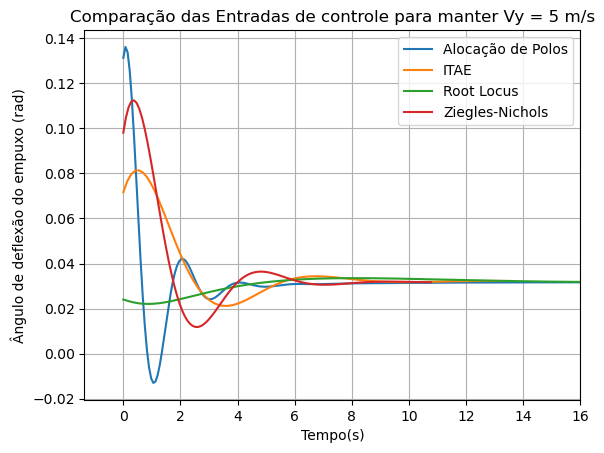

In [314]:

f,ax = plt.subplots(1, 1)
ax.plot(Traloc, 5*yraloc, label = "Alocação de Polos")
ax.plot(Tritae, 5*yritae, label = "ITAE")
ax.plot(Trroot, 5*yrroot, label = "Root Locus")
ax.plot(Trzieg, 5*yrzieg, label = "Ziegles-Nichols")
plt.ylabel('Ângulo de deflexão do empuxo (rad)')
plt.title('Comparação das Entradas de controle para manter Vy = 5 m/s')
plt.xlabel('Tempo(s)')
ax.grid()
ax.set_xlim(right=16)
ax.legend()

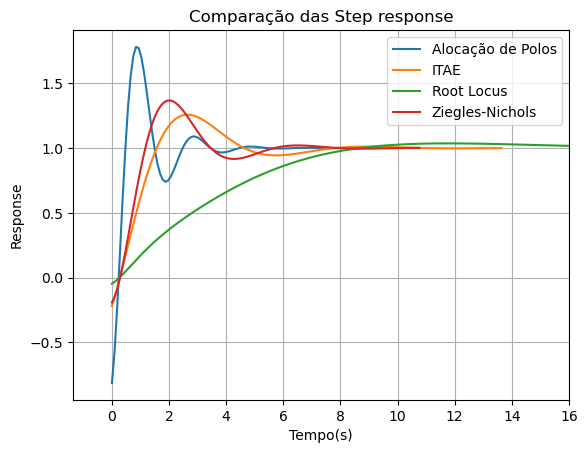

In [347]:

f,ax = plt.subplots(1, 1)
ax.plot(Taloc, yaloc, label = "Alocação de Polos")
ax.plot(Titae, yitae, label = "ITAE")
ax.plot(Troot, yroot, label = "Root Locus")
ax.plot(Tzieg, yzieg, label = "Ziegles-Nichols")
plt.ylabel('Response')
plt.title('Comparação das Step response')
plt.xlabel('Tempo(s)')
ax.grid()
ax.set_xlim(right=16)
ax.legend()